# Alloy Property Prediction Analysis

This notebook demonstrates the usage of the AlloyPredictor class for analyzing and predicting alloy properties.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from alloy_ml_prediction import AlloyPredictor

## Load and Examine Data

In [2]:
predictor = AlloyPredictor()
X, y = predictor.load_alloy_data('../data/sample_alloy_data.csv')

print("Features shape:", X.shape)
print("\nFirst few rows of features:")
display(X.head())
print("\nFirst few target values:")
display(y.head())

Features shape: (10, 5)

First few rows of features:


,C1,C2,C3,C4,C5
0,0.20,0.30,0.15,0.25,0.1
1,0.25,0.25,0.20,0.20,0.1
2,0.30,0.20,0.25,0.15,0.1
3,0.15,0.35,0.20,0.20,0.1
4,0.25,0.30,0.15,0.20,0.1



First few target values:


0    250
1    275
2    300
3    225
4    260
Name: HV, dtype: int64

## K-Fold Cross-Validation Analysis

In [3]:
results = predictor.perform_kfold_analysis(X, y, n_splits=5)

print("K-fold Analysis Results:")
for fold in results['fold_results']:
    print(f"\nFold {fold['fold']}:")
    print(f"Training RMSE: {fold['rmse_train']:.4f}")
    print(f"Testing RMSE: {fold['rmse_test']:.4f}")
    print(f"Training R²: {fold['r2_train']:.4f}")
    print(f"Testing R²: {fold['r2_test']:.4f}")

K-fold Analysis Results:

Fold 1:
Training RMSE: 5.6977
Testing RMSE: 12.0946
Training R²: 0.9447
Testing R²: -22.4047

Fold 2:
Training RMSE: 6.6365
Testing RMSE: 10.5002
Training R²: 0.9141
Testing R²: 0.5100

Fold 3:
Training RMSE: 6.9911
Testing RMSE: 9.6177
Training R²: 0.8928
Testing R²: -0.6444

Fold 4:
Training RMSE: 7.6376
Testing RMSE: 5.0000
Training R²: 0.8847
Testing R²: 0.9184

Fold 5:
Training RMSE: 3.8188
Testing RMSE: 22.6691
Training R²: 0.9416
Testing R²: 0.5135


## Compare Analytical and Gradient Descent Solutions

In [4]:
analytical_coef = predictor.analytical_solution(X, y)
gradient_coef = predictor.gradient_descent(X, y)

print("Coefficient Comparison:")
print("Analytical Solution:", analytical_coef)
print("Gradient Descent:", gradient_coef)

Coefficient Comparison:
Analytical Solution: [  -75.       621.875    320.      1260.      1208.4375 -1772.5   ]
Gradient Descent: [225.1981563   70.72260171  39.14770945  51.91959826  40.17266254
  22.13988657]


## Visualize Gradient Descent Convergence

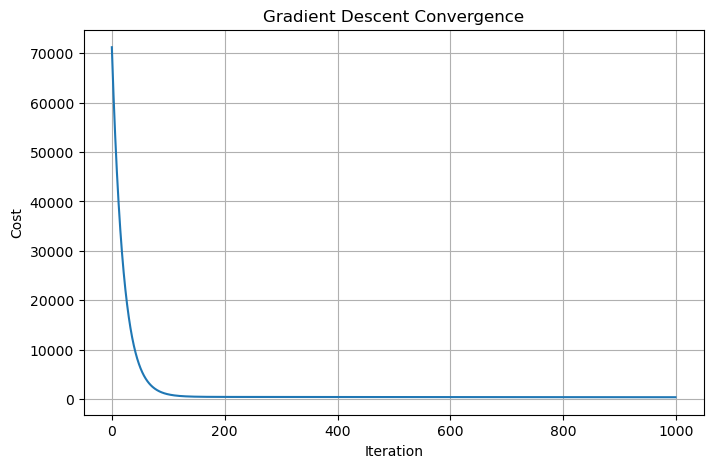

In [5]:
predictor.plot_convergence(X, y)